In [1]:
import sys
sys.path.append('../../Scripts')
from PostProcessingScripts import * 
import pandas as pd 
import string 
# just to make the cells appear wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import h5py as h5
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import string


import astropy.constants as c
import astropy.units as u
import pandas as pd 


In [2]:
G = 6.67259 * 10**(-8) # [gr cm s^2
c = 3 * 10**10
Msun = 1.99 * 10**(33)
AU = 1.5*10**11 #Rsun


Rsch = (G * 200*Msun / c**2 ) / AU

def KeplerIII(Pdays, M1sun, M2sun):
    
    separation = (Pdays)**(2/3) * (c.G * (M1sun + M2sun)*u.M_sun)**(1/3) * (4*np.pi**2)**(-1/3)
    
    separation.to(u.AU)
    return a





In [3]:

# # set_channels(z= 0.001)
# channels,seeds = set_channels(z=0.001)
# seed_b, seed_a, seed_c, seed_d, seed_e, seed_f , seed_g    = seeds
# channel_b, channel_a, channel_c, channel_d, channel_e, channel_f, channel_g = channels

def printHeaders(pathData): # x1, x2, x3,
    
    
        
    
    d = pd.read_csv(pathData, sep='\t', header=1) 

    
    print(np.asarray(list(d.columns)).T) 
    return


beta = '/beta_0_25'
seed = 40001314
dataDetailed = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/data_detailedOutput/massTransferEfficiencyFixed/seed_' + str(seed) + beta + '/dataOutput_0.dat'
printHeaders(pathData=dataDetailed)

['%SEED' 'dt' 'time' 'separation' 'eccentricity' 'mass1_0' 'mass2_0'
 'mass1' 'mass2' 'massEnv1' 'massEnv2' 'massCore1' 'massCore2'
 'massHeCore1' 'massHeCore2' 'massCOCore1' 'massCOCore2' 'Radius1'
 'Radius2' 'RocheLobe1/a' 'RocheLobe2/a' 'Radius1/RL1' 'Radius2/RL2'
 'omega1' 'omega2' 'omegaBreak1' 'omegaBreak2' 'S1type' 'S2type' 'Age1'
 'Age2' 'Lum1' 'Lum2' 'Teff1' 'Teff2' 'AngMom1' 'AngMom2' 'tauDynamical1'
 'tauDynamical2' 'tauThermal1' 'tauThermal2' 'tauNuclear1' 'tauNuclear2'
 'ZThermal1' 'ZThermal2' 'ZNuclear1' 'ZNuclear2' 'ZSPH1' 'ZSPH2' 'ZSPHHe1'
 'ZSPHHe2' 'ZHurley1' 'ZHurley2' 'ZHurleyHe1' 'ZHurleyHe2' 'Zsimple1'
 'Zsimple2' 'dmWinds1' 'dmWinds2' 'dmMassTransfer1' 'dmMassTransfer2'
 'MTtype' 'AngMomTotal' 'EnergyTotal' 'Nanjing1' 'Nanjing2' 'Loveridge1'
 'Loveridge2' 'Kruckow1Top' 'Kruckow2Top' 'Kruckow1Mid' 'Kruckow2Mid'
 'Kruckow1Bot' 'Kruckow2Bot' 'Metallicity1' 'Metallicity2'
 'massTransferTracker' 'pulsarMagneticField1' 'pulsarMagneticField2'
 'pulsarSpinFrequency1' 'pu

In [4]:
ST_dict = {'0' : 'smallMS', '1' : ' MS ', '2' : ' HG ', '3' : ' GB ',\
           '4' : 'CHeB', '5' : 'EAGB', '6' : 'TPAGB', '7' : 'HeMS'\
          , '8' : 'HeHG', '9' : 'HeGB', '10' : 'HeWD', '11' : 'COWD', '12' :'ONeWD', '13' : '  NS', '14' : '  BH'  }

4


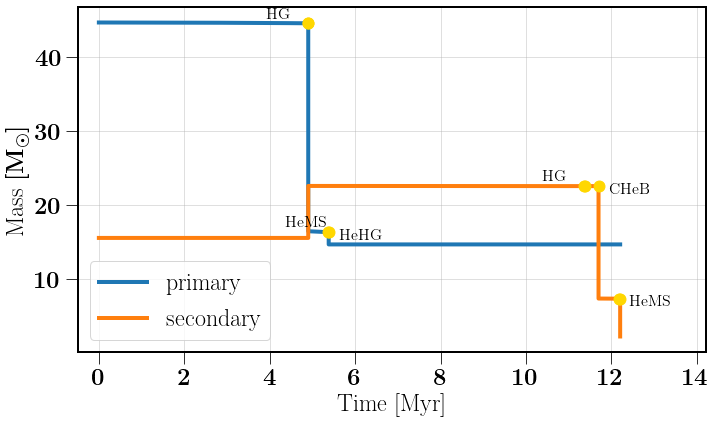

4


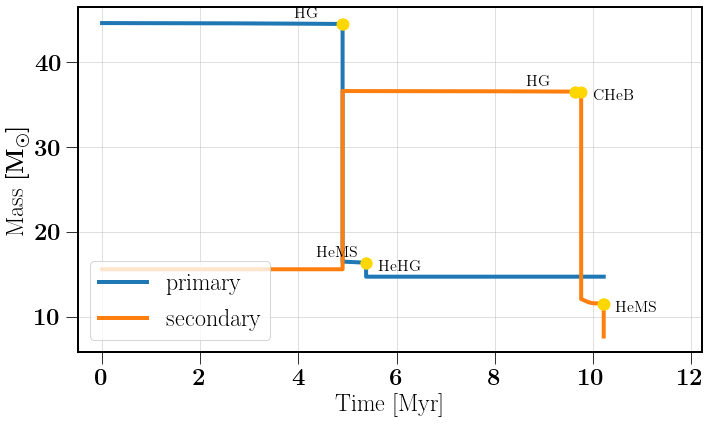

4


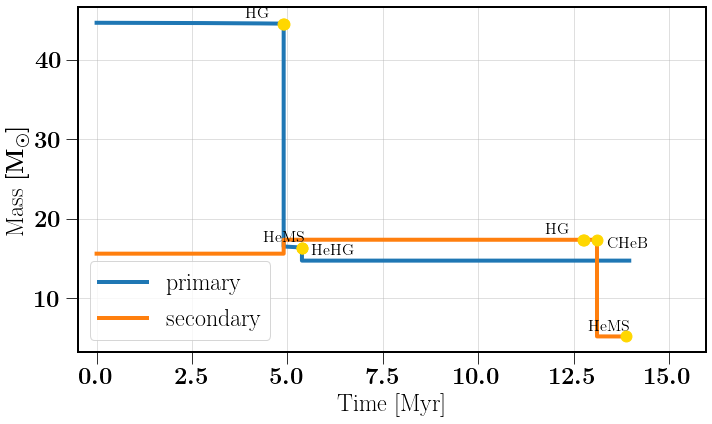

In [5]:

colorlist = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 'gold']

def plotDetailedEvolution(seed, x_m1, x_m2, ylabel, dirname, metallicity): # x1, x2, x3,
    """    """
        
    outputPath = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/data_detailedOutput/massTransferEfficiencyFixed/seed_' + str(seed)  + '/' + dirname + '/dataOutput_0.dat'
 
    
    data = np.genfromtxt(outputPath, skip_header=1, names=True) 
    
    # obtaingiven parameters
    param_m1 = data[x_m1]
    param_m2 = data[x_m2]
    
    # we always need the parameters below
    StellarType1 = data['S1type']
    StellarType2 = data['S2type']
    time = data['time']
    
    # obtain mask for when Stellar Type changes 
    maskST1changes = np.where(StellarType1[:-1] != StellarType1[1:])[0]
    maskST2changes = np.where(StellarType2[:-1] != StellarType2[1:])[0]
    
    
    f, axarr = plt.subplots(1, 1, figsize=(10, 6))
    # plot given parameters for star 1 and star 2
    axarr.plot(time, param_m1, lw = 4, c=colorlist[0], label = 'primary')
    axarr.plot(time, param_m2, lw = 4, c=colorlist[1], label = 'secondary')
    

    # plot stellartype + a scatter point when steller type changes
    print(len(time[maskST1changes]))
    axarr.scatter(time[maskST1changes], param_m1[maskST1changes], s=120, c=colorlist[6],\
                  marker='o', edgecolors =None, zorder=1000)
    axarr.scatter(time[maskST2changes], param_m2[maskST2changes], s=120, c=colorlist[6],\
                  marker='o', edgecolors =None, zorder = 1000)
    
    
    x_offset, y_offset = .25, .7
    
    time_prev_1 = 0
    time_prev_2 = 0
    
    
    
    'mass1' 'mass2' 
    
    for ind, ST in enumerate(StellarType1[maskST1changes][:]):
        if ind==0:
            continue
        else:
            time_this_1 = time[maskST1changes][ind] 
            time_this_2 = time[maskST2changes][ind] 
            
            if abs(time_this_1 - time_prev_1) >= 1./3:
                axarr.text(time[maskST1changes][ind]-(x_offset+.75), param_m1[maskST1changes][ind]+(y_offset), \
                           s=ST_dict[str(int(ST))] , fontsize = 16)
            else:
                axarr.text(time[maskST1changes][ind]+(x_offset), param_m1[maskST1changes][ind]-(y_offset+0.25), \
                   s=ST_dict[str(int(ST))] , fontsize = 16)
                
            if abs(time_this_2 - time_prev_2) >= 1./2:
                axarr.text(time[maskST2changes][ind] -(x_offset+.75), param_m2[maskST2changes][ind]+(y_offset), \
                           s=ST_dict[str(int(StellarType2[maskST2changes][ind]))] , fontsize = 16)
            else:
                axarr.text(time[maskST2changes][ind]+(x_offset), param_m2[maskST2changes][ind]-(y_offset+0.25), \
                   s=ST_dict[str(int(StellarType2[maskST2changes][ind]))] , fontsize = 16)

        time_prev_1 = time[maskST1changes][ind] 
        time_prev_2 = time[maskST2changes][ind] 
        
        
#     axarr.text(0.8, 0.9, r'' , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe[ind_t].transAxes)#, weight = 'bold')
    
    # make plot look nicer with code below
    axarr.legend(fontsize = 24 , loc = 'lower left')

    axarr.grid(which='both')
    axarr.grid(which='minor', alpha=0.2)
    axarr.grid(which='major', alpha=0.5) 

    axarr.grid(True)
    axarr.tick_params(labelsize=24)
    axarr.set_xlabel('Time [Myr]', fontsize=24)
    axarr.set_ylabel('%s'%ylabel, fontsize=24)     
    
#     f.tight_layout()
    plt.xlim(-0.5,max(time)+2)
    plt.tight_layout()
    plt.savefig('./'+str(metallicity) + '_' + str(seed)+ '_%s_'%dirname + '.pdf')
    plt.show()
    
    
    return



dataDetailed = '/Volumes/TOSHIBA EXT/black_hole-neutron_star/Fiducial/detailed/'
metallicity = 0.0001
# seedsListZ0_0142 =  [423008360, 426005772,428003416,421571114,421529742,427512491,429011652,421033982]

beta = '/beta_0_25'
seed = 40001314
dataDetailed = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/data_detailedOutput/massTransferEfficiencyFixed/seed_' + str(seed) + beta + '/dataOutput_0.dat'


beta = '/beta_0_75'
seed = 40001314
dataDetailed_075 = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/data_detailedOutput/massTransferEfficiencyFixed/seed_' + str(seed) + beta + '/dataOutput_0.dat'

beta='fiducial'



for dirname in ['beta_0_25', 'beta_0_75', 'fiducial']:
    plotDetailedEvolution(seed=seed, x_m1='mass1', x_m2='mass2', ylabel=r'Mass $[\rm{M}_{\odot}]$', dirname=dirname, metallicity=metallicity)




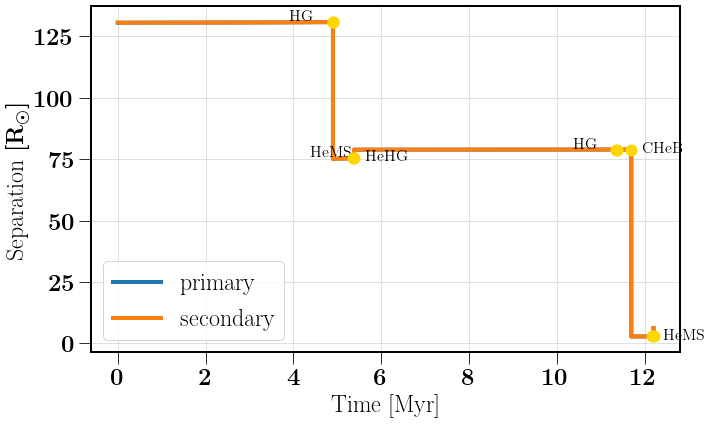

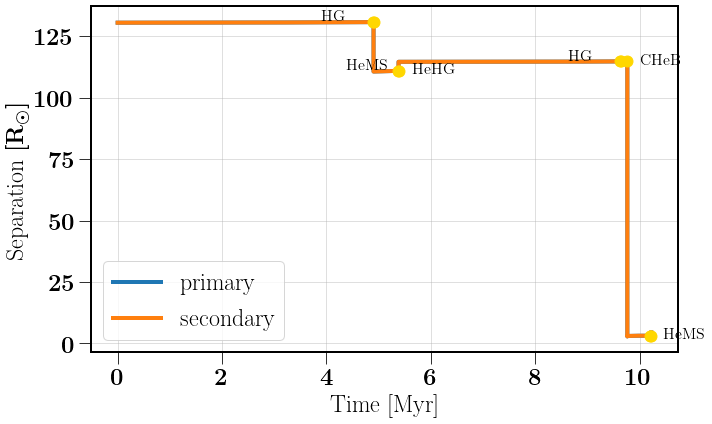

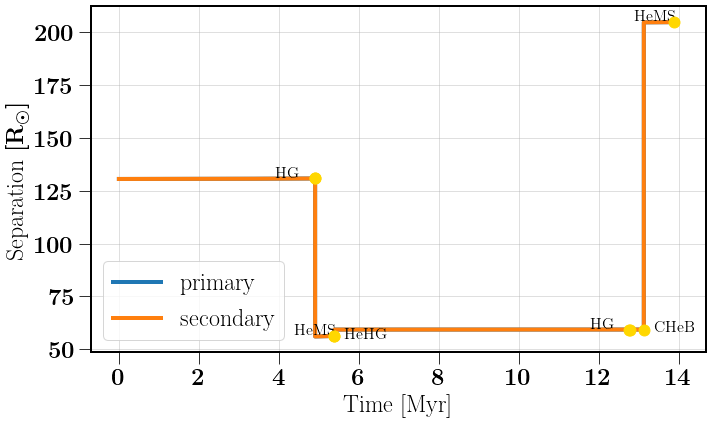

In [6]:
def plotDetailedEvolution(seed, x_m1, x_m2, ylabel, dirname, metallicity): # x1, x2, x3,
    """    """
    
    
    f, axarr = plt.subplots(1, 1, figsize=(10, 6))   
    outputPath = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/data_detailedOutput/massTransferEfficiencyFixed/seed_' + str(seed)  + '/' + dirname + '/dataOutput_0.dat'

    
    data = np.genfromtxt(outputPath, skip_header=1, names=True)         
        
    

    # obtaingiven parameters
    param_m1 = data[x_m1]
    param_m2 = data[x_m2]
    
    # we always need the parameters below
    StellarType1 = data['S1type']
    StellarType2 = data['S2type']
    time = data['time']
    
    # obtain mask for when Stellar Type changes 
    maskST1changes = np.where(StellarType1[:-1] != StellarType1[1:])[0]
    maskST2changes = np.where(StellarType2[:-1] != StellarType2[1:])[0]
    
    

    # plot given parameters for star 1 and star 2
    axarr.plot(time, param_m1, lw = 4, c=colorlist[0], label = 'primary')
    axarr.plot(time, param_m2, lw = 4, c=colorlist[1], label = 'secondary')
    

    # plot stellartype + a scatter point when steller type changes
    axarr.scatter(time[maskST1changes], param_m1[maskST1changes], s=120, c=colorlist[6],\
                  marker='o', edgecolors =None, zorder=1000)
    axarr.scatter(time[maskST2changes], param_m2[maskST2changes], s=120, c=colorlist[6],\
                  marker='o', edgecolors =None, zorder = 1000)
    
    
    x_offset, y_offset = .25, .7
    
    time_prev_1 = 0
    time_prev_2 = 0
    for ind, ST in enumerate(StellarType1[maskST1changes][:]):
        if ind==0:
            continue
        else:
            time_this_1 = time[maskST1changes][ind] 
            time_this_2 = time[maskST2changes][ind] 
            
            if abs(time_this_1 - time_prev_1) >= 1./3:
                axarr.text(time[maskST1changes][ind]-(x_offset+.75), param_m1[maskST1changes][ind]+(y_offset), \
                           s=ST_dict[str(int(ST))] , fontsize = 16)
            else:
                axarr.text(time[maskST1changes][ind]+(x_offset), param_m1[maskST1changes][ind]-(y_offset+0.25), \
                   s=ST_dict[str(int(ST))] , fontsize = 16)
                
            if abs(time_this_2 - time_prev_2) >= 1./2:
                axarr.text(time[maskST2changes][ind] -(x_offset+.75), param_m2[maskST2changes][ind]+(y_offset), \
                           s=ST_dict[str(int(StellarType2[maskST2changes][ind]))] , fontsize = 16)
            else:
                axarr.text(time[maskST2changes][ind]+(x_offset), param_m2[maskST2changes][ind]-(y_offset+0.25), \
                   s=ST_dict[str(int(StellarType2[maskST2changes][ind]))] , fontsize = 16)

        time_prev_1 = time[maskST1changes][ind] 
        time_prev_2 = time[maskST2changes][ind] 
    
    # make plot look nicer with code below
    axarr.legend(fontsize = 24 , loc = 'lower left')

    axarr.grid(which='both')
    axarr.grid(which='minor', alpha=0.2)
    axarr.grid(which='major', alpha=0.5) 

    axarr.grid(True)
    axarr.tick_params(labelsize=24)
    axarr.set_xlabel('Time [Myr]', fontsize=24)
    axarr.set_ylabel('%s'%ylabel, fontsize=24)     
    
#     f.tight_layout()

    plt.tight_layout()
    plt.savefig('./radius_ '+str(metallicity) + '_' + str(seed)+ '_%s_'%dirname + '.pdf')
    plt.show()
    
    
    return




for dirname in ['beta_0_25', 'beta_0_75', 'fiducial']:
    plotDetailedEvolution(seed=seed, x_m1='separation', x_m2='separation', ylabel=r'Separation $[\rm{R}_{\odot}]$', dirname=dirname, metallicity=metallicity)






In [57]:

def print_properties(seed, dirname):
    print()

    outputPath = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/data_detailedOutput/massTransferEfficiencyFixed/seed_' + str(seed)  + '/' + dirname + '/formationHistory.txt'

    data = np.genfromtxt(outputPath, skip_header=1, names=True)  
    
    
    print(data)
    
# #     print(df.columns)
#     print('CEE failed =', df['CEE_failed'])
#     print('merged_in_Hubble_time', df['merged_in_Hubble_time'])
#     print('binary_disbound', df['binary_disbound']) 
    
    
#     outputPath = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/data_detailedOutput/massTransferEfficiencyFixed/seed_' + str(seed)  + '/' + dirname + '/systemParameters.txt'

#     df = pd.read_csv(outputPath, delimiter = "\t", skiprows=[0,1], index_col=1)  
#     print('stellar_merger', df['stellar_merger'])
#     print('disbound', df['disbound'])

    
    
    
    return
    
    


seed = 40001314
for dirname in ['beta_0_25', 'beta_0_75', 'fiducial']:  
    
    print_properties(seed=seed,dirname=dirname)


[(      nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)
 (40001314.,  6.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  4.,  5., 14.,  8.,  0.,  0.,  0.,  2.,  0.,  0.,  6.,  0.,  0.,  4.,  2.,  0.,  0.,  0.,  0., 14.,  8.,  1.,  0.)]

[(      nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)
 (40001314.,  6.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  4.,  5., 14.,  7.,  0.,  0.,  0.,  2.,  0.,  0.,  6.,  0.,  0.,  4.,  2.,  0.,  0.,  0.,  0., 14.,  7.,  1.,  0.)]

[(      nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)
 (40001314.,  5.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0

## 